<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
Exploratory Data Analysis (EDA) is an approach for data analysis that employs a variety of techniques (mostly graphical) to

1.maximize insight into a data set;

2.uncover underlying structure;

3.extract important variables;

4.detect outliers and anomalies;

5.test underlying assumptions;

6.develop parsimonious models; and

7.determine optimal factor settings


---
<a name = Section2></a>
# **2. Problem Statement**
---


- **Problem Statement:**

 

1.In the past few years, prices of new cars have skyrocketed, due to which most people are incapable of buying a new one.

2.Customers buying a new car always looks for assurity of their money to be worthy.

3.But due to the increased price of new cars, used car sales are on a global increase (Pal, Arora and Palakurthy, 2018).

4.There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features.

5.The company has earned its name because of sincerity in work and quality of services.

6.But for past few months their sales is down for some reason and they are unable to figure it out.

  

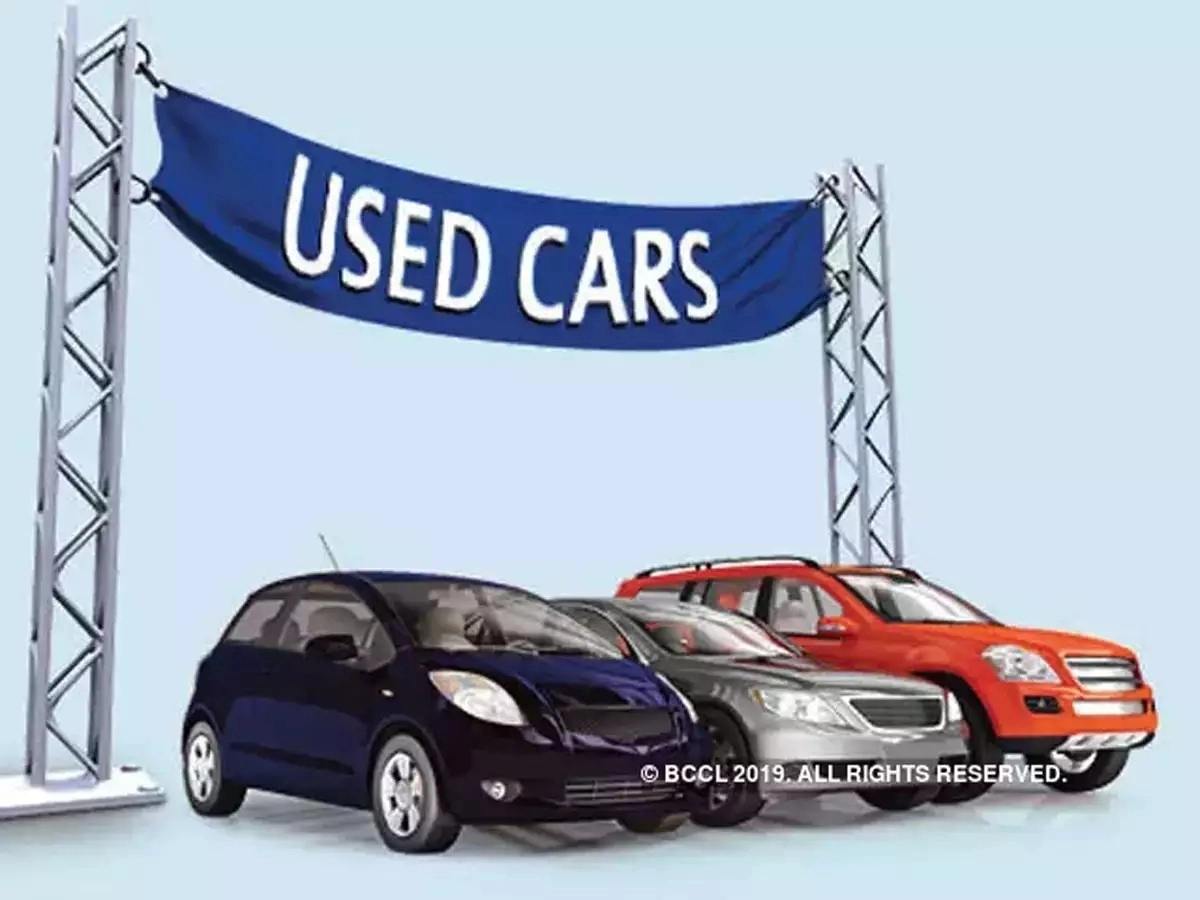

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
!pip install -q datascience                                         
!pip install -q pandas-profiling                                  


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling                       

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp            
# Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------


# **4. Data Acquisition & Description

This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases)


- You will be working with a direct source of link to head start your work without worrying about anything


- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [4]:
carsales_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', carsales_df.shape)
carsales_df.head()


Data Shape: (9576, 10)


car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

In [5]:
carsales_df.tail()

car    price       body  mileage  engV engType registration  \
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full

In [6]:
print(carsales_df.columns)

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')


In [7]:
carsales_df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [8]:
carsales_df.describe()

price      mileage         engV         year
count    9576.000000  9576.000000  9142.000000  9576.000000
mean    15633.317316   138.862364     2.646344  2006.605994
std     24106.523436    98.629754     5.927699     7.067924
min         0.000000     0.000000     0.100000  1953.000000
25%      4999.000000    70.000000     1.600000  2004.000000
50%      9200.000000   128.000000     2.000000  2008.000000
75%     16700.000000   194.000000     2.500000  2012.000000
max    547800.000000   999.000000    99.990000  2016.000000

In [9]:
carsales_df.describe(include = "all")

car          price   body      mileage         engV engType  \
count         9576    9576.000000   9576  9576.000000  9142.000000    9576   
unique          87            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           936            NaN   3646          NaN          NaN    4379   
mean           NaN   15633.317316    NaN   138.862364     2.646344     NaN   
std            NaN   24106.523436    NaN    98.629754     5.927699     NaN   
min            NaN       0.000000    NaN     0.000000     0.100000     NaN   
25%            NaN    4999.000000    NaN    70.000000     1.600000     NaN   
50%            NaN    9200.000000    NaN   128.000000     2.000000     NaN   
75%            NaN   16700.000000    NaN   194.000000     2.500000     NaN   
max            NaN  547800.000000    NaN   999.000000    99.990000     NaN   

       registration         year    model  drive  
count          9576  9576.000000     9576   9065  
unique            2          NaN      888      3  
top             yes          NaN  E-Class  front  
freq           9015          NaN      199   5188  
mean            NaN  2006.605994      NaN    NaN  
std             NaN     7.067924      NaN    NaN  
min             NaN  1953.000000      NaN    NaN  
25%             NaN  2004.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2012.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

 **Data Information**

In [10]:
carsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [11]:
pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\user\anaconda3\lib\site-packages (2.10.0)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas_profiling

In [13]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html


profile = carsales_df.profile_report(title="UsedCar's Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="usedcars.html")



In [14]:
profile

The profiing report describes

There are 113 duplicated rows (Action - Remove the duplcates)

1% of missing cells are in the dataset (Action - Replace with default/mean value or discard the record)

5 Categorical variables, 4 numeric variables and 1 boolean value


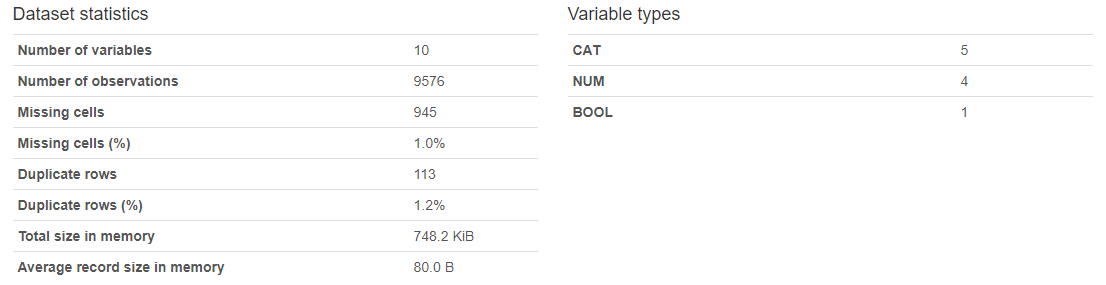


---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [15]:
carsales_df.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

In [16]:
missing_data = carsales_df.isnull()
missing_data.head(5)

car  price   body  mileage   engV  engType  registration   year  model  \
0  False  False  False    False  False    False         False  False  False   
1  False  False  False    False  False    False         False  False  False   
2  False  False  False    False  False    False         False  False  False   
3  False  False  False    False  False    False         False  False  False   
4  False  False  False    False   True    False         False  False  False   

   drive  
0  False  
1  False  
2  False  
3  False  
4   True

In [17]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

car
False    9576
Name: car, dtype: int64

price
False    9576
Name: price, dtype: int64

body
False    9576
Name: body, dtype: int64

mileage
False    9576
Name: mileage, dtype: int64

engV
False    9142
True      434
Name: engV, dtype: int64

engType
False    9576
Name: engType, dtype: int64

registration
False    9576
Name: registration, dtype: int64

year
False    9576
Name: year, dtype: int64

model
False    9576
Name: model, dtype: int64

drive
False    9065
True      511
Name: drive, dtype: int64



In [18]:
carsales_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [19]:
carsales_df['engV'].fillna((carsales_df['engV'].median()),inplace = True)

In [20]:
carsales_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [21]:
carsales_df['drive']=carsales_df['drive'].fillna('front')
carsales_df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class  front  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9576 rows x 10 columns]

In [22]:
carsales_df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

Handling the duplicate values



In [23]:
carsales_df.duplicated().sum()


113

In [24]:
carsales_df.duplicated().sum()
carsales_df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class  front  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9576 rows x 10 columns]

In [25]:
carsales_df.duplicated().sum()


113

In [26]:
carsales_df.drop_duplicates(keep= 'first', inplace= True)
carsales_df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class  front  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

Handling missing or zero values

In [27]:
carsales_df['price']=carsales_df['price'].replace(0,carsales_df['price'].median())
carsales_df['mileage']=carsales_df['mileage'].replace(0,carsales_df['mileage'].median())
carsales_df['engV']=carsales_df['engV'].replace(0,carsales_df['engV'].median())
carsales_df


car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class  front  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

In [28]:
carsales_df.dropna()

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class  front  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

Pandas profiling after data preprocessing

In [29]:
profile = carsales_df.profile_report(title="UsedCar's Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="usedcars.html")

In [30]:
profile

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [31]:
profile = carsales_df.profile_report(title="UsedCar's Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="usedcars.html")

In [32]:
profile

# 7.1 CarSales dataset stats & warnings

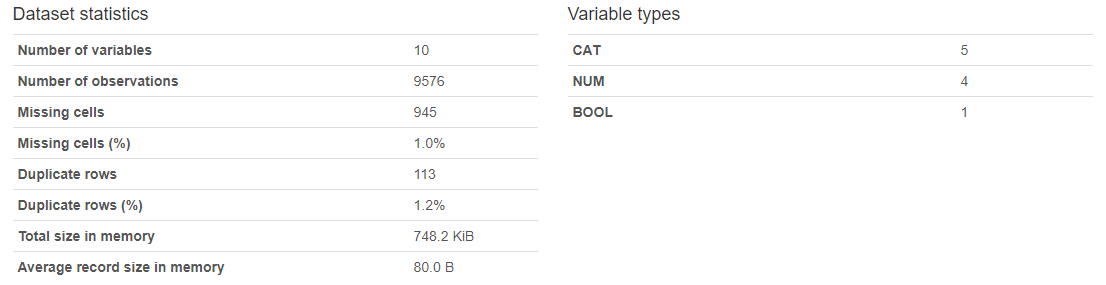

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

In [33]:
carsales_df.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   2.0   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class  front

In [34]:
carsales_df.tail()

car    price       body  mileage  engV engType registration  \
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full

Relationship analysis

In [35]:
corelation = carsales_df.corr()

In [36]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

<AxesSubplot:>

In [37]:
sns.pairplot(carsales_df)

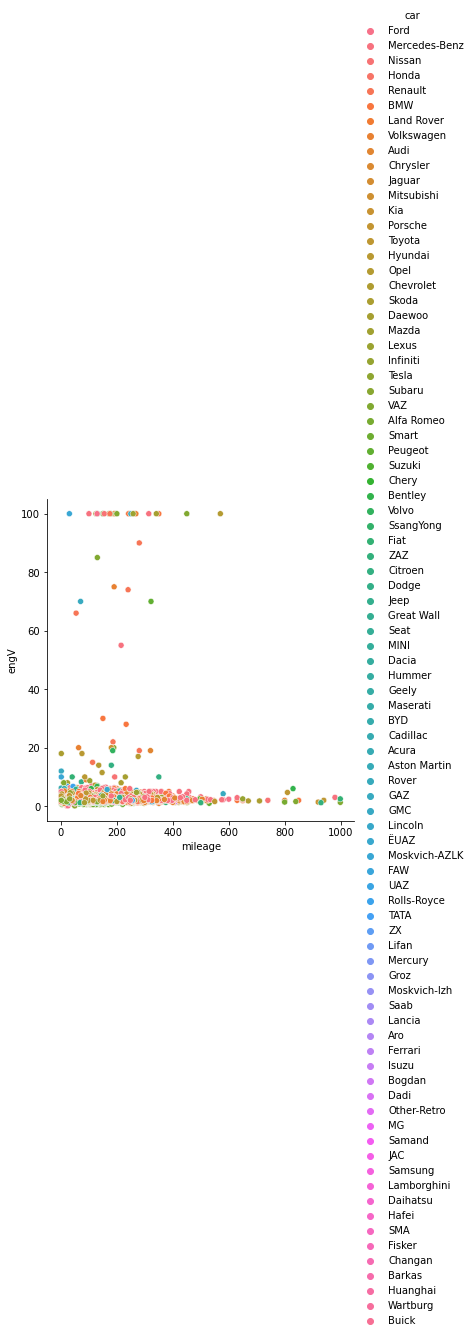

In [38]:
sns.relplot(x='mileage', y='engV', hue='car', data=carsales_df)

In [39]:
sns.distplot(carsales_df['price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

<AxesSubplot:xlabel='mileage', ylabel='Count'>

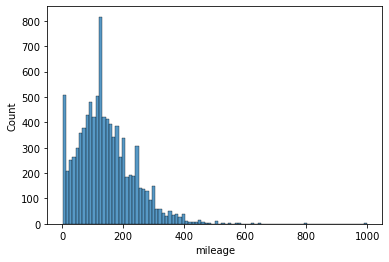

In [40]:
sns.histplot(carsales_df['mileage'])

<AxesSubplot:xlabel='mileage', ylabel='Count'>

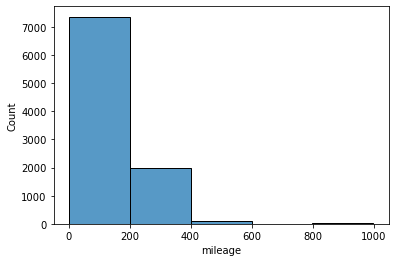

In [41]:
sns.histplot(carsales_df['mileage'],bins=5)

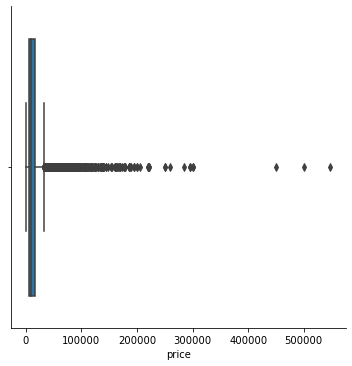

In [42]:
sns.catplot(x='price',kind= 'box',data= carsales_df)

In [43]:
carsales_df['engType'].value_counts()

Petrol    4341
Diesel    2950
Gas       1710
Other      462
Name: engType, dtype: int64

<AxesSubplot:title={'center':'engType Vs price'}, xlabel='engType', ylabel='price'>

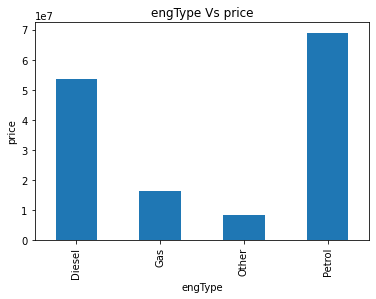

In [44]:
var = carsales_df.groupby('engType').price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('engType')
ax1.set_ylabel('price')
ax1.set_title("engType Vs price")
var.plot(kind='bar')

In [45]:
carsales_df['car'].value_counts()

Volkswagen       927
Mercedes-Benz    885
BMW              684
Toyota           529
VAZ              488
                ... 
ZX                 1
Buick              1
FAW                1
Maserati           1
Samsung            1
Name: car, Length: 87, dtype: int64

In [46]:
var = carsales_df.groupby('car').price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Car name')
ax1.set_ylabel('Increase In price')
ax1.set_title("car Vs price")
var.plot(kind='bar')

<AxesSubplot:title={'center':'car Vs price'}, xlabel='car', ylabel='Increase In price'>

In [47]:
df = pd.DataFrame(carsales_df.car.value_counts())
print(df.head)

<bound method NDFrame.head of                car
Volkswagen     927
Mercedes-Benz  885
BMW            684
Toyota         529
VAZ            488
...            ...
ZX               1
Buick            1
FAW              1
Maserati         1
Samsung          1

[87 rows x 1 columns]>


# 8.1 Q - Which car manufacturer had highest sales?

In [48]:
ax = df.head(10).plot.bar(figsize=(15,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/4), p.get_height()+5), rotation=0)
    
plt.title("Top 10 car brands on sale")

Text(0.5, 1.0, 'Top 10 car brands on sale')

In [49]:
carsales_df['model'].value_counts()

E-Class          192
A6               172
Camry            132
Vito ïàññ.       128
Lanos            126
                ... 
Saibao             1
Probe              1
Actyon Sports      1
Thema              1
Karma              1
Name: model, Length: 888, dtype: int64

In [50]:
carsales_df['year'].value_counts()

2008    1150
2007     929
2012     760
2011     691
2013     641
2006     563
2016     415
2005     413
2010     383
2014     354
2009     346
2004     337
2003     282
2015     240
2000     231
2002     219
2001     216
1999     160
1998     152
1996     124
1997     123
1995      85
1994      76
1991      70
1990      64
1992      62
1988      60
1993      53
1989      50
1986      45
1987      43
1985      28
1984      15
1979      10
1982      10
1980       9
1981       8
1978       7
1983       7
1977       6
1976       4
1969       3
1963       2
1974       2
1971       2
1962       2
1961       2
1953       1
1958       1
1970       1
1975       1
1959       1
1964       1
1972       1
1973       1
1968       1
Name: year, dtype: int64

# 8.2 Q - What is the sales trend for top selling car manufacturers?

In [51]:
carsales_year_df = pd.DataFrame(carsales_df.groupby('year').car.value_counts())
carsales_year_df.rename(columns={'car':'sales'}, inplace=True)
carsales_year_df.reset_index(inplace=True)

In [52]:
topCarBrandSales = carsales_year_df[carsales_year_df.car.isin(df.head(5).index)]
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=topCarBrandSales, x='year', y='sales', hue='car')

<AxesSubplot:xlabel='year', ylabel='sales'>

In [53]:
recentCarSalesTopBrands = carsales_year_df[carsales_year_df.car.isin(df.head(5).index) &  (carsales_year_df.year >= 2010)]
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=recentCarSalesTopBrands, x='year', y='sales', hue='car')

<AxesSubplot:xlabel='year', ylabel='sales'>

In [54]:
carsales_df[carsales_df.price.isin(carsales_df.price.nlargest(10))].sort_values('price', ascending=False)

car     price       body  mileage  engV engType registration  \
7621        Bentley  547800.0      sedan      129  6.75  Petrol          yes   
1611        Bentley  499999.0  crossover      129  6.00  Petrol          yes   
4134        Bentley  449999.0  crossover      129  6.00  Petrol          yes   
4325  Mercedes-Benz  300000.0      sedan       68  6.00  Petrol          yes   
5849  Mercedes-Benz  300000.0      other       37  5.00  Petrol          yes   
1891  Mercedes-Benz  295000.0      sedan       29  6.00  Petrol          yes   
2165  Mercedes-Benz  295000.0      sedan       29  6.00  Petrol          yes   
8205     Land Rover  285000.0  crossover      129  5.00  Petrol          yes   
1478        Bentley  259000.0      sedan      129  6.00  Petrol          yes   
564   Mercedes-Benz  250000.0      other        6  5.50  Petrol          yes   

      year        model  drive  
7621  2016     Mulsanne   rear  
1611  2016     Bentayga   full  
4134  2016     Bentayga   full  
4325  2011        S 600  front  
5849  2012        G 500   full  
1891  2011        S 600   rear  
2165  2011      S-Guard   rear  
8205  2016  Range Rover   full  
1478  2014  Flying Spur   full  
564   2016     S 63 AMG   full

In [55]:
cars_with_max_price_df = pd.DataFrame(carsales_df.groupby('car').price.max())
cars_with_max_price_df.reset_index(inplace=True)
cars_with_max_price_df.rename(columns={'price':'max_price'}, inplace=True)

In [56]:
def get_totalcarsales(r):
    return carsales_df[(carsales_df.car == r.car) & (carsales_df.price == r.max_price)].car.count()

def get_latestyearofsale(r):
    return carsales_df[(carsales_df.car == r.car) & (carsales_df.price == r.max_price)].year.max()

In [57]:
cars_with_max_price_df['total_sales'] = cars_with_max_price_df.apply(get_totalcarsales, axis=1)
cars_with_max_price_df['recently_sold_on'] = cars_with_max_price_df.apply(get_latestyearofsale, axis=1)

<AxesSubplot:xlabel='recently_sold_on', ylabel='max_price'>

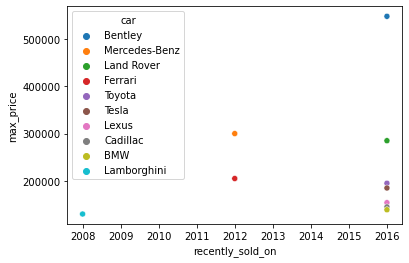

In [58]:
sns.scatterplot(data=cars_with_max_price_df.sort_values('max_price', ascending=False).head(10), x='recently_sold_on', y='max_price', hue='car')

# **Observations:

# Top 10 premium car's sales reported as follows.

Bentley

Mulsanne

Bentayga

Flying Spur

Mercedes-Benz

S 600

G 500

S-Guard

Land Rover

Range Rover

# Sales of these cars gives interesting result.


Though Mercedes-Benz and Land Rover are proven strength in sales under Premium sector, neverthless Bentley dominating recently in this segment.

Following cars are reported premium car sales in recent years:

Bentley

Mercedes-Benz

Land Rover

Ferrari

Toyota

Tesla

Lexus

Cadillac

BMW

Lamborghini

But latest reported high priced cars sold as below.

Lamborghini - 2008

Mercedes-Benz & Ferrari - 2012

There are no such high priced cars sold from 2013 till 2015

Tremendus sales reported in 2016 for these super premium cars by Bentley, Land Rover, Toyota, Tesla, Lexus, Cardillac & BMW

It's also worth to note that,

Crossovers are leading in this space followed by sedans

Preferred to have full wheel and rear wheel drive

All these premium cars engine type is Petrol



#  8.3 Q What are the sales & revenue in each segment of class ?

In [59]:
'''

Function that computes the class of the car based on price
Rules:
    -- Economy --> Price less than 10000 
    -- Luxury  --> Price above 10000 and below 30000
    -- Premium --> Price above 30000
'''
def classify_class(r):
    if r.price <= 10000:
        return "Economy"
    elif (r.price > 10000) & (r.price <= 30000):
        return "Luxury"
    else:
        return "Premium"

In [60]:
carsales_df["class"] = carsales_df.apply(classify_class, axis=1)

Text(0.5, 1.0, 'Car sales based on Class')

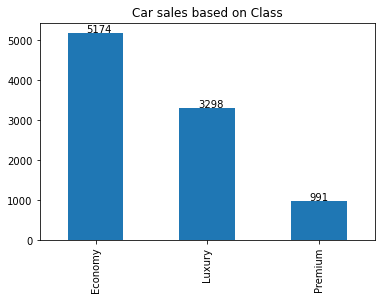

In [61]:
ax = carsales_df["class"].value_counts().plot.bar(figsize=(6,4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)
    
plt.title("Car sales based on Class")

In [62]:
revenueByClass_df = carsales_df.groupby('class').price.sum()
plt.title('Revenue against Class')
print(revenueByClass_df.plot.pie(autopct='%1.1f%%'))

AxesSubplot(0.260833,0.125;0.503333x0.755)


# Observations:

Economy Cars are best selling segment followed by Luxury and Premium
Though the economy car sales are predominant in sales, but revenues are not impressive.

Economy - 18.6%

Luxury - 37.2%

Premium - 44.2%


# 8.4 Q - What is the revenue generated in each segment of class ?

In [63]:
pvt_classyear_sales = carsales_df.pivot_table(index=['year','class'],  values="car", aggfunc='count')
pvt_classyear_sales.reset_index(inplace=True)
pvt_classyear_sales.rename(columns={"car":"car_sales"}, inplace=True)

In [64]:
'''
Function that returns revenue of a perticular segment in a specific year
'''
def get_revenuebyclass(r):
    return carsales_df[(carsales_df['class'] == r['class']) & (carsales_df.year == r.year)].price.sum()

In [65]:
pvt_classyear_sales['revenue'] = pvt_classyear_sales.apply(get_revenuebyclass, axis=1)

In [66]:
def get_detailsbyclass(cls):
    return pvt_classyear_sales[pvt_classyear_sales['class'] == cls]

def get_detailsbyclass(cls, year):
    return pvt_classyear_sales[(pvt_classyear_sales['class'] == cls) & (pvt_classyear_sales.year >= year)]

In [67]:
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=pvt_classyear_sales[pvt_classyear_sales.year >= 1990], x='year', y='car_sales', hue='class')

<AxesSubplot:xlabel='year', ylabel='car_sales'>

<AxesSubplot:xlabel='year', ylabel='revenue'>

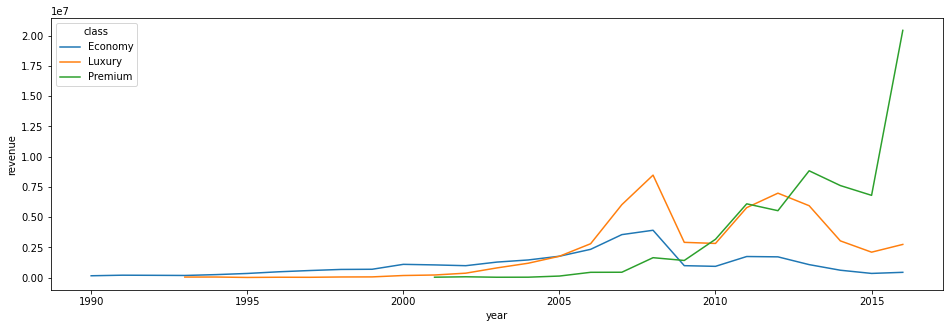

In [68]:
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=pvt_classyear_sales[pvt_classyear_sales.year >= 1990], x='year', y='revenue', hue='class')


# Observations:

From the above charts, it is evedent that,

economy car sales are comes to '0', Luxury and Premium takes the momentum of high sales.

In addition the revenue generated by Premium cars is 500% higher than other cars in recent year.

So possible reason of reduced sales due to ground touching Economy class car sales.



# 8.5 Q - What is the sales trend based on body ?

In [69]:
carsalesbybody_df = carsales_df.pivot_table(index=['body'],  values="car", aggfunc='count')
carsalesbybody_df.reset_index(inplace=True)
carsalesbybody_df.rename(columns={'car':'sales'}, inplace=True)

In [70]:
recent_carsalesbybody_df = carsales_df[carsales_df.year > 2010].pivot_table(index=['body'],  values="car", aggfunc='count')
recent_carsalesbybody_df.reset_index(inplace=True)
recent_carsalesbybody_df.rename(columns={'car':'sales'}, inplace=True)

In [71]:
pvt_bodyyear_sales = carsales_df.pivot_table(index=['year','body'],  values="car", aggfunc='count')
pvt_bodyyear_sales.rename(columns={"car":"car_sales"}, inplace=True)
pvt_bodyyear_sales.reset_index(inplace=True)

def get_sales_by_body(body):
    return pvt_bodyyear_sales[pvt_bodyyear_sales['body'] == body]


In [72]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=carsalesbybody_df, x='body', y='sales')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)

plt.title('Overall car sales based on body type')

Text(0.5, 1.0, 'Overall car sales based on body type')

Text(0.5, 1.0, 'Recent 5 years car sales based on body type')

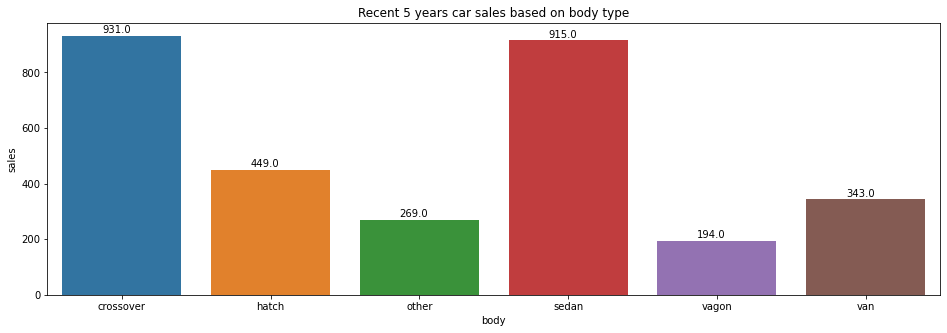

In [73]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=recent_carsalesbybody_df, x='body', y='sales')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)

plt.title('Recent 5 years car sales based on body type')

# Observations:

Overall Crossover, Sedan and hatches are more demanded car body types.

It is observed that recent crossover sales are skyrocketing.


# 8.6 Q - What are the best mileage cars in each segment of 'class' ?

In [74]:
besteconomycars = carsales_df.pivot_table(index=['class','car'],  values="mileage", aggfunc='max')
besteconomycars.reset_index(inplace=True)

In [75]:
# Return upper whisker for mileage by class
def get_best_carandmileage_byclass(cls):
    clsmileage = besteconomycars[besteconomycars['class'] == cls]
    maxval = clsmileage.mileage.max()
    thirdQurtile = clsmileage.describe().iloc[6].mileage   
    firstQurtile = clsmileage.describe().iloc[4].mileage     
    iqr = thirdQurtile - firstQurtile
    upperwhisker = min(maxval, thirdQurtile + (1.5 * iqr))
    return upperwhisker

# Get closest upper whisker milage results
def get_closest(cls, val):
    cls_df = carsales_df[carsales_df['class'] == cls]
    return cls_df.iloc[(cls_df['mileage']-val).abs().argsort()[:2]]

Text(0.5, 1.0, 'Mileage vs Class')

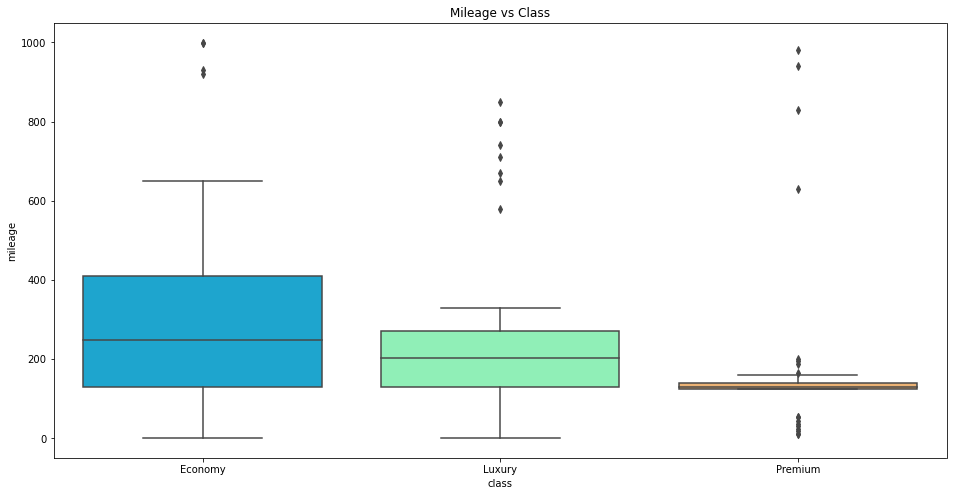

In [76]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=besteconomycars, x='class', y='mileage', palette='rainbow')

plt.title('Mileage vs Class')

In [77]:
print(besteconomycars[besteconomycars['class'] == 'Economy'].describe())
print('---------------------')
print(besteconomycars[besteconomycars['class'] == 'Luxury'].describe())
print('---------------------')
print(besteconomycars[besteconomycars['class'] == 'Premium'].describe())

          mileage
count   77.000000
mean   305.480519
std    224.861631
min      1.000000
25%    131.000000
50%    249.000000
75%    410.000000
max    999.000000
---------------------
          mileage
count   52.000000
mean   255.442308
std    220.468433
min      1.000000
25%    129.000000
50%    202.000000
75%    270.000000
max    850.000000
---------------------
          mileage
count   37.000000
mean   190.405405
std    240.807376
min     11.000000
25%    125.000000
50%    129.000000
75%    140.000000
max    980.000000


In [78]:
get_closest('Economy', get_best_carandmileage_byclass('Economy'))

car   price   body  mileage  engV engType registration  year model  \
4757  VAZ  3400.0  sedan      840   1.6  Petrol          yes  2007  2170   
4572  Kia  7150.0  hatch      920   1.4  Petrol          yes  2008  Ceed   

      drive    class  
4757  front  Economy  
4572  front  Economy

In [79]:
get_closest('Luxury', get_best_carandmileage_byclass('Luxury'))

car    price       body  mileage  engV engType registration  \
5009  Mercedes-Benz  12300.0      sedan      423   5.0     Gas          yes   
8509  Mercedes-Benz  15000.0  crossover      400   3.0  Diesel          yes   

      year               model drive   class  
5009  1997               S 500  rear  Luxury  
8509  1997  Sprinter 212 ïàññ.  full  Luxury

In [80]:
get_closest('Premium', get_best_carandmileage_byclass('Premium'))

car    price       body  mileage  engV engType registration  \
2847  Mercedes-Benz  36000.0  crossover      162   3.0  Diesel          yes   
370             BMW  34600.0  crossover      163   5.0  Petrol          yes   

      year   model drive    class  
2847  2009  GL 320  full  Premium  
370   2011    X5 M  full  Premium

# Observations:

Following are the best mileage given cars in each segment.

Economy --> Kia - Ceed & ZAZ - 1103

Luxury --> Volkswagen - Eos & Mercedes-Benz - S 500

Premium --> Mercedes-Benz - Sprinter 318 & GL 320


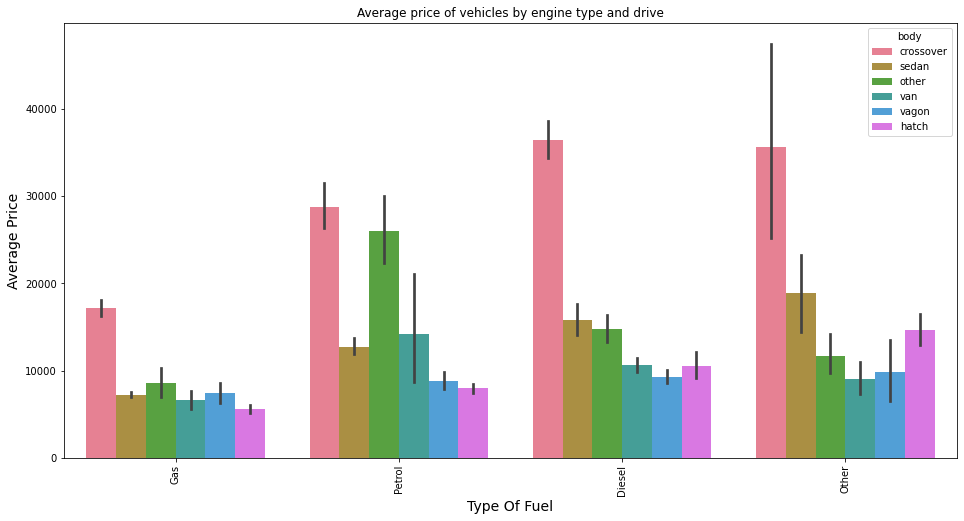

In [81]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x="engType", y="price", hue= "body", palette="husl",data=carsales_df)
ax.set_title("Average price of vehicles by engine type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

# car sales by drive

Text(0.5, 1.0, 'Overall car sales by drive')

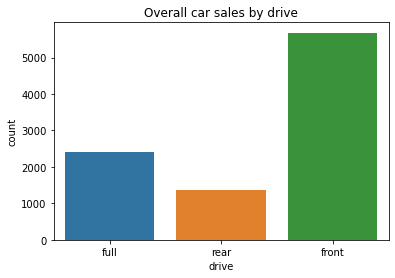

In [82]:
#fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='drive', data=carsales_df, orient='h')
plt.title("Overall car sales by drive")

Text(0.5, 1.0, 'Latest 5 year car sales by drive')

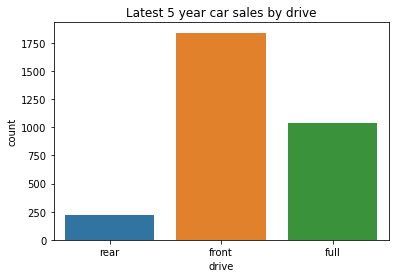

In [83]:
#fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='drive', data=carsales_df[carsales_df.year > 2010], orient='h')
plt.title("Latest 5 year car sales by drive")

# Sales percentage by engine type

In [84]:
carsalesrecent_df = carsales_df[carsales_df.year.isin(pd.DataFrame(carsales_df.year.unique())[0].nlargest())]
carsalesrecent_pv = carsalesrecent_df.pivot_table(index=['engType'], values='car', aggfunc="count")
carsalesrecent_pv.rename(columns={'car':'sales'}, inplace=True)

In [85]:
carsalesold_df = carsales_df[carsales_df.year < 2012]
carsalesold_pv = carsalesold_df.pivot_table(index=['engType'], values='car', aggfunc="count")
carsalesold_pv.rename(columns={'car':'sales'}, inplace=True)

<AxesSubplot:ylabel='sales'>

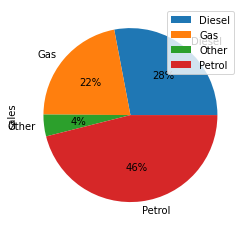

In [86]:
carsalesold_pv.plot.pie(y='sales', x='engType', autopct="%0.0f%%")

<AxesSubplot:ylabel='sales'>

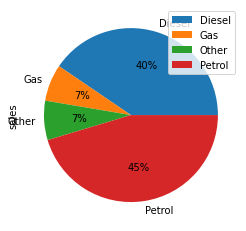

In [87]:
carsalesrecent_pv.plot.pie(y='sales', x='engType', autopct="%0.0f%%")

# Observations:

Though the cars with Gas engine type sold at most economical price, in the recent days customers are not preferred.

Most preferred engine type is Petrol and Diesel.

Other engine type cars are gradually increasing in sales despite of its high price.

Front & Full wheel drive cars mostly opted by customers. Rear wheel drive car sales are declined drastically in last 5 years

Most sales happening price range is between 10000 to 40000 /-


# 9. Summarization

# 9.1 Conclusion

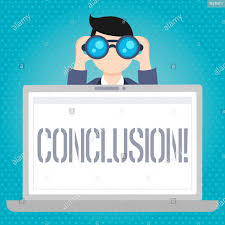

Most sales happening price range is between 10000 to 40000 /-

There are very few cars sold in 20000 to 36000 price bracket, which is best competitive price range

Though the cars with Gas engine type sold at most economical price, in the recent days customers are not preferred.

None of the cars sold from Economy segment in year 2016.

From the recent past the car sales are stagnated on Gas type. In other hand


Petrol car sales are consistent

Diesel car sales are gaining momentum

Other car sales are gradullay increasing

Car registrations are most considered in Luxury and Premium cars

Even with effordable price range, gas and other engine type cars are least preferred.

Most preferred

engine types are Petrol and Diesel

body types are cross-overs and sedan

Other type cars are consistent and gradually increasing in sales

Irrespective of tenure, Sedans are always on demand follows with Cross-over and hatch.

Tremendus sales reported in 2016 for these super premium cars by Bentley, Land Rover, Toyota, Tesla, Lexus, Cardillac & BMW

recently Crossovers are leading in sales followed by sedans

Most of the recent premium cars engine type is Petrol

Cars Loose / Gain Demand

Following are the brands which loose the market

VAZ

Moskvich-AZLK

Lincoln

UAZ

GAZ

Opel

Mazda
Volvo

Fiat

Peugeot

Daewoo

Chevrolet

Following are the brands which gain/sustain the market

Audi

Ford

Mercedes-Benz

Volkswagen

BMW

Nissan

Toyota

Mitsubishi

Renault

Skoda

Hyundai

Honda




# 9.2 Actionable Insights

Cars should be available from all price ranges.

As 10000 to 40000 /- is the most sales happening price range and there are no cars available in 20000 to 36000 /- price bracket, procuring these price ranged cars should protentially improves the sales.
Sense the customer likelyhood and market more such cars.
Petrol and Diesel cars are most popular.

Full wheel drive is most preferred in Crossovers and Front wheel drive in Sedan cars
So bring more inventory from most value for money branded cars like Mercedes-Benz, Toyota, BMW, Volkswagen etc.. 

Crossovers with Full wheel drive Sedans with front wheel drive

Luxury and Premium used cars booming sales due to hike in new car prices.

Market & Procure more latest, future ready and sophisticated cars like Engine type other (Hybrid and Electric cars). Despite the fact that car sales fluctuated across years, the Other cars sales are consistent and seen ramp up in sales recently.

Immediate tactical approach and Impressive strategic approach

Tactical Approach

Less preferred old cars should be announced with great deals and clear the stock. In that way we can save money, renting space for storage
Procure more demaded cars like Mercedes-Benz, BMW, Volkswagen, Toyota, Nissan, Ford, Audi.. etc

Strategic Approach

Economy cars are ideally most selling. And most recent economy car are gas engines which are not preferred by customers. So procure more Economy price range cars which is of Petrol or Diesel engine types